In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
#df = pd.read_pickle('/scratch/mentalism/data/user_classification/user_age.pkl')
#df_ua = pd.read_pickle('/g100_work/IscrC_mental/data/user_classification/user_age.pkl')
df = pd.read_pickle('/g100_work/IscrC_mental/data/user_classification/user_age_v2.pkl')
df_bio = pd.read_pickle('/g100_work/IscrC_mental/data/user_classification/user_age_bio.pkl')
#df = pd.read_pickle('/g100_work/IscrC_mental/data/user_classification/user_age_gender_location.pkl')
df.columns

Index(['tweet_id', 'user_id', 'created_at', 'tweet', 'status', 'regex_type',
       'regex_idx', 'age_raw', 'year_tweet', 'age_in_2023',
       'age_when_tweeted'],
      dtype='object')

In [3]:
print(df.shape)
print(df_bio.shape)

(32977, 11)
(2550, 6)


In [4]:
# check if there are bad age regex patterns
print(np.sort(df.age_when_tweeted.unique()))

for i in df[df['age_when_tweeted']==10].iloc[:10].tweet:
    print(i)
    print('----------')

[  0   1   4   5   7  10  11  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 102 107 108 114 115 120]
@MimmoAdinolfi Ciocci a 9 anni mi sembrava gesùcristosulleacque, poi ho compiuto 10 anni
----------
@AlfonsoFuggetta Professore io ho 10 anni che lavoro temporaneo, in varie società ora guadagno 900€ euro mensili ho due figlie e se devo spendere 300€ al mese addio , ho fatto il vaccino ma avrei voluto aspettare o anche un trattamento diverso
----------
@paolomaggioni Ho 10 anni e vedo alla tivù Marcello Fiasconaro che ci fa il pazzesco mondiale: 1’43”7. Per me l’Arena sarà per sempre quel ricordo lì
----------
Caro diario,
oggi ho 10 anni.
Ormai sono grande!
Questo è il mio ulti

In [5]:
# check if there are bad age regex patterns
print(np.sort(df_bio.age_raw.unique()))

for i in df_bio[df_bio['age_raw']==10].iloc[:10].bio:
    print(i)
    print('----------')

[  10   11   12   13   14   15   16   17   18   19   20   21   22   23
   24   25   26   27   28   29   30   31   32   33   34   35   36   37
   38   39   40   41   42   43   44   45   46   47   48   49   50   51
   52   53   54   55   56   57   58   59   60   61   62   63   64   65
   66   67   68   69   70   71   72   73   74   75   76   77   78   79
   80   81   82   83   84   85   87   88   96 1903 1906 1920 1925 1926
 1928 1929 1930 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943
 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957
 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971
 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007]
ho 10 anni e mi piace fare le foto anche se la mia passione e cantare
----------
Io sono nir abito a .... faccio basket i miei idoli sono benji e fede ho 10 anni seguitemi sui i

In [6]:
# clean from extreme ages
df = df[(df['age_when_tweeted']<=100) & (df['age_when_tweeted']>=10)]
df_bio = df_bio[(df_bio['age_raw']<=2007) & (df_bio['age_raw']>=10)]

print(df.shape)
print(df_bio.shape)

# append to tweet-age data
#path = os.path.join(uc_dir, 'user_age.pkl')
#df_tweetage = pd.read_pickle(path)

df_bio['user_id'] = df_bio['user_id'].astype('int64')
df['user_id'] = df['user_id'].astype('int64')

# Ensure that data types are the same for the common columns
common_columns = df.columns.intersection(df_bio.columns)
for col in common_columns:
    if df[col].dtype != df_bio[col].dtype:
        # If data types are different, convert them to the same data type
        df[col] = df[col].astype(df_bio[col].dtype)

# Now, you can safely concatenate the DataFrames
df_all = pd.concat([df, df_bio])

df_all = pd.concat([df, df_bio])
print(df_all.shape)

# save
df_all.to_pickle('/g100_work/IscrC_mental/data/user_classification/user_age_allsources.pkl')

(32963, 11)
(2550, 6)
(35513, 12)


In [7]:
df_all

,tweet_id,user_id,created_at,tweet,status,regex_type,regex_idx,age_raw,year_tweet,age_in_2023,age_when_tweeted,bio
0,1.114455e+18,22873,2019-04-06 09:07:29+00:00,“C’ho 52 anni e c’ho i fiji dell’età tua!”\n\n...,processed,age_digit,2,52,2019.0,56.0,52.0,NaN
1,1.280448e+18,451943,2020-07-07 10:24:17+00:00,"Io oggi compio 46 anni, voi invece che scuse a...",processed,age_digit,1,46,2020.0,49.0,46.0,NaN
2,1.160207e+18,536013,2019-08-10 15:10:02+00:00,"Oggi compio 45 anni, ma sono in ottima compagn...",processed,age_digit,1,45,2019.0,49.0,45.0,NaN
3,1.422936e+18,607983,2021-08-04 15:04:26+00:00,@jesuiscialis Meno male che ho 27 anni.,processed,age_digit,2,27,2021.0,29.0,27.0,NaN
4,6.141480e+17,612953,2015-06-25 19:07:58+00:00,"Ciao sono Elio, ho 32 anni e mi sono perso gli...",processed,age_digit,2,32,2015.0,40.0,32.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2647,NaN,1305602636582879232,NaT,NaN,processed,bio_age_digit,2,14,NaN,NaN,NaN,Mi piace la politica \r\ne ho 14 anni
2648,NaN,1430248572,NaT,NaN,processed,bio_birth_year,4,1987,NaN,NaN,NaN,"Violet_ a.k.a. Chiara, born in 1987 in Bergamo..."
2649,NaN,461366197,NaT,NaN,processed,bio_age_chars,6,50,NaN,NaN,NaN,ciao a tutti sono una cinquantenne alla riscos...
2650,NaN,911599206493716480,NaT,NaN,processed,bio_age_digit,2,16,NaN,NaN,NaN,"sono irene ho 16 anni, sono grassa e faccio la..."


In [11]:
print(df_all['created_at'].isna().sum())
print(df_all.duplicated().any())

2550
False


# Merge with gender and location

In [14]:
df_all = pd.read_pickle('/g100_work/IscrC_mental/data/user_classification/user_age_allsources.pkl')
df_gender_location = pd.read_pickle('/g100_work/IscrC_mental/data/user_classification/user_gender_location.pkl')

In [15]:
print(df_all.columns)
print(df_gender_location.columns)

df_all_selected = df_all[['tweet_id', 'user_id', 'created_at', 'tweet', 'status', 'regex_type',
                          'regex_idx', 'age_raw', 'year_tweet', 'age_in_2023', 'age_when_tweeted']]
df_gender_location_selected = df_gender_location[['user_id', 'username', 'full_name', 'location', 'join_year',
                                                 'join_month', 'bio', 'join_day', 'tweets', 'following', 'followers',
                                                 'likes', 'loc_count', 'location_clean', 'foreign_country',
                                                 'all_regions', 'region_pos', 'region', 'term_for_italy',
                                                 'name_city_engl', 'condition', 'city_id', 'all_cities', 'city_pos',
                                                 'region_code', 'is_male']]

joint_df = df_all_selected.merge(df_gender_location_selected, on='user_id', how='inner', suffixes=('_age', '_gender'))

    
# Rename the 'bio_gender_location' column to 'bio'
# joint_df.rename(columns={'bio_gender_location': 'bio'}, inplace=True)

# Create a list of columns to drop, and drop
#columns_to_drop = [col for col in joint_df.columns if col.startswith('bio_')]
#joint_df.drop(columns=columns_to_drop, inplace=True)


print(joint_df.shape)
print(joint_df.columns)

Index(['tweet_id', 'user_id', 'created_at', 'tweet', 'status', 'regex_type',
       'regex_idx', 'age_raw', 'year_tweet', 'age_in_2023', 'age_when_tweeted',
       'bio'],
      dtype='object')
Index(['user_id', 'username', 'full_name', 'location', 'join_year',
       'join_month', 'join_day', 'bio', 'tweets', 'following', 'followers',
       'likes', 'loc_count', 'location_clean', 'foreign_country',
       'all_regions', 'region_pos', 'region', 'term_for_italy',
       'name_city_engl', 'condition', 'city_id', 'all_cities', 'city_pos',
       'region_code', 'is_male'],
      dtype='object')
(20747, 36)
Index(['tweet_id', 'user_id', 'created_at', 'tweet', 'status', 'regex_type',
       'regex_idx', 'age_raw', 'year_tweet', 'age_in_2023', 'age_when_tweeted',
       'username', 'full_name', 'location', 'join_year', 'join_month', 'bio',
       'join_day', 'tweets', 'following', 'followers', 'likes', 'loc_count',
       'location_clean', 'foreign_country', 'all_regions', 'region_pos',
    

In [16]:
print(joint_df['user_id'].isna().any())
print(joint_df.duplicated().any())
print(joint_df['regex_type'].unique())

False
False
['age_digit' 'age_chars' 'birth_year' 'bio_birth_year' 'bio_age_digit'
 'bio_age_chars']


In [17]:
joint_df.shape

(20747, 36)

Read list of users with images and add column with this info

In [18]:
list_imgs = pd.read_pickle('/g100_work/IscrC_mental/data/database/scrape/imgs.pkl')

In [19]:
joint_df['user_has_image'] = joint_df['user_id'].isin(list_imgs)
df = joint_df
print(df.shape)
print(df['user_has_image'].sum())

(20747, 37)
11462


In [20]:
# save to file
df.to_pickle('/g100_work/IscrC_mental/data/user_classification/user_age_gender_location.pkl')

In [2]:
df = pd.read_pickle('/g100_work/IscrC_mental/data/user_classification/user_age_gender_location.pkl')

In [3]:
df_wi = df[df.user_has_image]

In [7]:
df_wi

,tweet_id,user_id,created_at,tweet,status,regex_type,regex_idx,age_raw,year_tweet,age_in_2023,...,region,term_for_italy,name_city_engl,condition,city_id,all_cities,city_pos,region_code,is_male,user_has_image
0,1.114455e+18,22873,2019-04-06 09:07:29+00:00,“C’ho 52 anni e c’ho i fiji dell’età tua!”\n\n...,processed,age_digit,2.0,52.0,2019.0,56.0,...,emilia romagna,italy,,0.0,37006,|bologna|,0.0,8.0,True,True
2,1.422936e+18,607983,2021-08-04 15:04:26+00:00,@jesuiscialis Meno male che ho 27 anni.,processed,age_digit,2.0,27.0,2021.0,29.0,...,None,None,None,NaN,None,None,NaN,NaN,True,True
3,6.141480e+17,612953,2015-06-25 19:07:58+00:00,"Ciao sono Elio, ho 32 anni e mi sono perso gli...",processed,age_digit,2.0,32.0,2015.0,40.0,...,puglia,,,0.0,73027,|taranto|,0.0,16.0,True,True
5,2.252178e+17,625703,2012-07-17 13:18:04+00:00,"ANSA: ""è l'ansia che fa invecchiare le donne"" ...",processed,age_digit,2.0,90.0,2012.0,101.0,...,lazio,italy,rome,0.0,58091,|roma|,0.0,12.0,False,True
6,1.454749e+18,625733,2021-10-31 09:57:45+00:00,"@Giulia_B Io ho trent’anni ma mio nonno, avess...",processed,age_chars,2.0,30.0,2021.0,32.0,...,None,,,0.0,,,NaN,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20740,NaN,280996428,NaT,NaN,processed,bio_age_digit,2.0,74.0,NaN,NaN,...,None,italia,,0.0,,,NaN,NaN,False,True
20741,NaN,390048344,NaT,NaN,processed,bio_birth_year,11.0,1947.0,NaN,NaN,...,veneto,,,0.0,27019,|jesolo|,0.0,5.0,True,True
20742,NaN,96453833,NaT,NaN,processed,bio_birth_year,11.0,1982.0,NaN,NaN,...,piemonte,,,0.0,1272,|torino|,0.0,1.0,True,True
20744,NaN,461366197,NaT,NaN,processed,bio_age_chars,6.0,50.0,NaN,NaN,...,lazio,,,0.0,58091,|roma|,0.0,12.0,False,True


# Demographic distributions

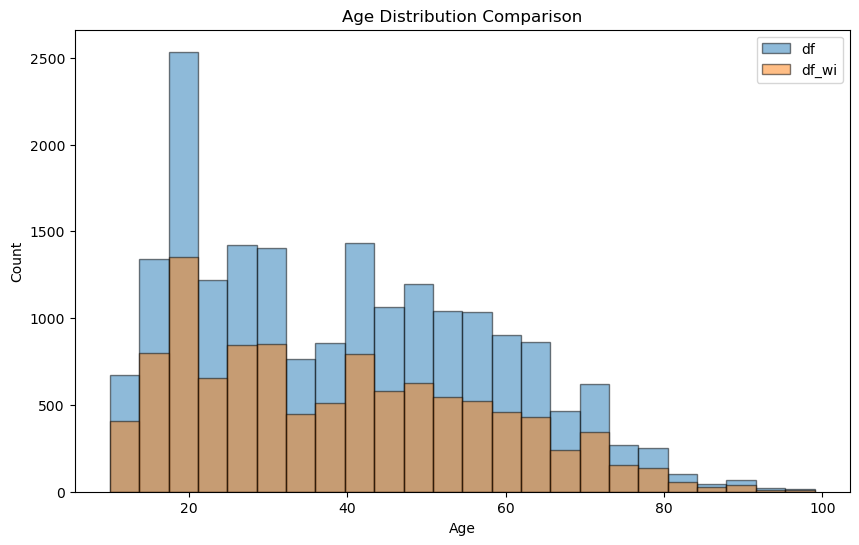

In [21]:
import matplotlib.pyplot as plt

# sample from users with image only
df_wi = df[df.user_has_image]

# Assuming df and df_wi are your DataFrames
plt.figure(figsize=(10, 6))

# Plot the histogram for df
plt.hist(df[df['age_raw']<=100].age_raw, bins=24, edgecolor='k', alpha=0.5, label='df')

# Plot the histogram for df_wi, overlapping with the previous plot
plt.hist(df_wi[df_wi['age_raw']<=100].age_raw, bins=24, edgecolor='k', alpha=0.5, label='df_wi')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution Comparison')
plt.legend()  # Display the legend to differentiate between the two DataFrames

# Set the x-axis limits to show only values from 0 to 23
#plt.xlim(0, 100)

plt.show()

In [23]:
import numpy as np

np.sort(df.age_raw.unique())

array([  10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
         21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
         32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,
         43,   44,   45,   46,   47,   48,   49,   50,   51,   52,   53,
         54,   55,   56,   57,   58,   59,   60,   61,   62,   63,   64,
         65,   66,   67,   68,   69,   70,   71,   72,   73,   74,   75,
         76,   77,   78,   79,   80,   81,   82,   83,   84,   85,   86,
         87,   88,   89,   90,   91,   92,   93,   94,   95,   96,   98,
         99, 1920, 1923, 1925, 1926, 1929, 1930, 1931, 1933, 1934, 1935,
       1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947,
       1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 19

In [24]:
df[df['regex_idx'] == 2.0]

,tweet_id,user_id,created_at,tweet,status,regex_type,regex_idx,age_raw,year_tweet,age_in_2023,...,region,term_for_italy,name_city_engl,condition,city_id,all_cities,city_pos,region_code,is_male,user_has_image
0,1.114455e+18,22873,2019-04-06 09:07:29+00:00,“C’ho 52 anni e c’ho i fiji dell’età tua!”\n\n...,processed,age_digit,2,52,2019.0,56.0,...,emilia romagna,italy,,0.0,37006,|bologna|,0.0,8.0,True,True
2,1.422936e+18,607983,2021-08-04 15:04:26+00:00,@jesuiscialis Meno male che ho 27 anni.,processed,age_digit,2,27,2021.0,29.0,...,None,None,None,NaN,None,None,NaN,NaN,True,True
3,6.141480e+17,612953,2015-06-25 19:07:58+00:00,"Ciao sono Elio, ho 32 anni e mi sono perso gli...",processed,age_digit,2,32,2015.0,40.0,...,puglia,,,0.0,73027,|taranto|,0.0,16.0,True,True
5,2.252178e+17,625703,2012-07-17 13:18:04+00:00,"ANSA: ""è l'ansia che fa invecchiare le donne"" ...",processed,age_digit,2,90,2012.0,101.0,...,lazio,italy,rome,0.0,58091,|roma|,0.0,12.0,False,True
6,1.454749e+18,625733,2021-10-31 09:57:45+00:00,"@Giulia_B Io ho trent’anni ma mio nonno, avess...",processed,age_chars,2,30,2021.0,32.0,...,None,,,0.0,,,NaN,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20738,NaN,1065323767,NaT,NaN,processed,bio_birth_year,2,1973,NaN,NaN,...,None,None,None,NaN,None,None,NaN,NaN,True,True
20740,NaN,280996428,NaT,NaN,processed,bio_age_digit,2,74,NaN,NaN,...,None,italia,,0.0,,,NaN,NaN,False,True
20743,NaN,1305602636582879232,NaT,NaN,processed,bio_age_digit,2,14,NaN,NaN,...,None,None,None,NaN,None,None,NaN,NaN,True,False
20745,NaN,911599206493716480,NaT,NaN,processed,bio_age_digit,2,16,NaN,NaN,...,lombardia,,,0.0,17029,|brescia|,0.0,3.0,False,True


In [25]:
df.groupby('age_raw').apply('count')[:20]

,tweet_id,user_id,created_at,tweet,status,regex_type,regex_idx,year_tweet,age_in_2023,age_when_tweeted,...,region,term_for_italy,name_city_engl,condition,city_id,all_cities,city_pos,region_code,is_male,user_has_image
age_raw,,,,,,,,,,,,,,,,,,,,,
10,131,136,131,131,136,136,136,131,131,131,...,37,50,50,50,50,50,33,37,136,136
11,97,122,97,97,122,122,122,97,97,97,...,36,52,52,52,52,52,28,36,122,122
12,147,183,147,147,183,183,183,147,147,147,...,57,78,78,78,78,78,50,57,183,183
13,184,232,184,184,232,232,232,184,184,184,...,71,94,94,94,94,94,64,71,232,232
14,194,240,194,194,240,240,240,194,194,194,...,94,122,122,122,122,122,90,94,240,240
15,291,346,291,291,346,346,346,291,291,291,...,147,189,189,189,189,189,134,147,346,346
16,342,392,342,342,392,392,392,342,342,342,...,179,226,226,226,226,226,165,179,392,392
17,308,362,308,308,362,362,362,308,308,308,...,158,210,210,210,210,210,149,158,362,362
18,581,636,581,581,636,636,636,581,581,581,...,275,368,368,368,368,368,252,275,636,636


In [26]:
# compare gender distributions
print(f"male to female ration in full sample: {df['is_male'].value_counts()[0]/df['is_male'].value_counts()[1]}")
print(f"male to female ration in imag sample: {df_wi['is_male'].value_counts()[0]/df_wi['is_male'].value_counts()[1]}")

male to female ration in full sample: 1.659871794871795
male to female ration in imag sample: 1.7090522335145355


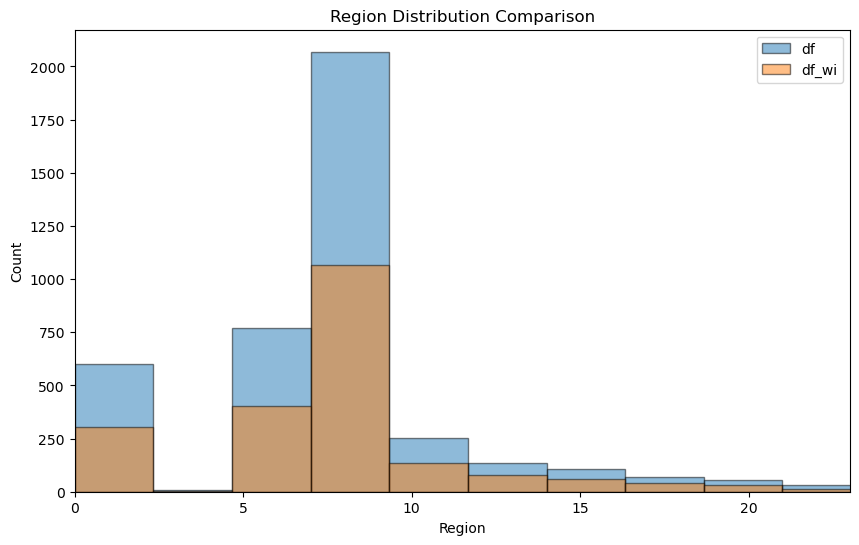

In [27]:
import matplotlib.pyplot as plt

# Assuming df and df_wi are your DataFrames
plt.figure(figsize=(10, 6))

# Plot the histogram for df
plt.hist(df['region_pos'], bins=24, edgecolor='k', alpha=0.5, label='df')

# Plot the histogram for df_wi, overlapping with the previous plot
plt.hist(df_wi['region_pos'], bins=24, edgecolor='k', alpha=0.5, label='df_wi')

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution Comparison')
plt.legend()  # Display the legend to differentiate between the two DataFrames

# Set the x-axis limits to show only values from 0 to 23
plt.xlim(0, 23)

plt.show()


In [28]:
print('ratio empty/nonempty bios in full:', (df.bio == '').astype('int').sum() / (df.bio != '').astype('int').sum())
print('ratio empty/nonempty bios in imag:', (df_wi.bio == '').astype('int').sum() / (df_wi.bio != '').astype('int').sum())

ratio empty/nonempty bios in full: 0.47413670598266305
ratio empty/nonempty bios in imag: 0.48973225890304134


In [31]:
test_set = df_wi.sample(n=1200, random_state=5)

In [54]:
print('ratio empty/nonempty bios in imag:', (test_set.bio == '').astype('int').sum() / (test_set.bio != '').astype('int').sum())
test_set

ratio empty/nonempty bios in imag: 0.4669926650366748


,tweet_id,user_id,created_at,tweet,status,regex_type,regex_idx,age_raw,year_tweet,age_in_2023,...,region,term_for_italy,name_city_engl,condition,city_id,all_cities,city_pos,region_code,is_male,user_has_image
8304,1.287299e+18,710931412,2020-07-26 08:07:54+00:00,"@StefanoGuerrera Sono una figlia, da piccola n...",processed,age_digit,2,30,2020.0,33.0,...,sicilia,,,0.0,82053,|palermo|,0.0,19.0,False,True
1249,3.742212e+17,93010155,2013-09-01 17:24:30+00:00,Per tutti i followers...... non sono il front ...,processed,age_digit,2,42,2013.0,52.0,...,None,None,None,NaN,None,None,NaN,NaN,True,True
13151,1.526259e+18,3129929010,2022-05-16 17:51:43+00:00,@ladyonorato Ho 51 anni e non mi è mai capitat...,processed,age_digit,2,51,2022.0,52.0,...,None,None,None,NaN,None,None,NaN,NaN,True,True
14232,7.115887e+17,711586115401203712,2016-03-20 16:22:30+00:00,@carmelitadurso ciao barbara ho ho seguito l'...,processed,age_digit,2,53,2016.0,60.0,...,None,None,None,NaN,None,None,NaN,NaN,False,True
15041,8.571806e+17,838898501916438528,2017-04-26 10:32:27+00:00,"@PietroF70 Diplomato alla scuola alberghiera,h...",processed,age_digit,2,42,2017.0,48.0,...,sardegna,,,0.0,90029,|florinas|,0.0,20.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,1.620028e+18,391431498,2023-01-30 11:54:31+00:00,@justcallme_sug Ma Ranieri è più agile di me c...,processed,age_digit,2,40,2023.0,40.0,...,None,italia,,0.0,,,NaN,NaN,False,True
7972,3.000139e+17,596805596,2013-02-08 22:50:51+00:00,"Mi chiamo Marianna, ho 28 anni e vorrei crede...",processed,age_digit,2,28,2013.0,38.0,...,None,,,0.0,,,NaN,NaN,False,True
12842,1.458498e+18,2982836854,2021-11-10 18:13:46+00:00,"@civati Populismo di sinistra, populismo di de...",processed,age_digit,2,47,2021.0,49.0,...,None,,,0.0,,,NaN,NaN,True,True
19942,NaN,745801747382280192,NaT,NaN,processed,bio_age_digit,2,43,NaN,NaN,...,None,None,None,NaN,None,None,NaN,NaN,True,True


In [35]:
test_set.to_pickle('/g100_work/IscrC_mental/data/user_classification/user_age_gender_location_manual_eval.pkl')

In [36]:
test_set.columns

Index(['tweet_id', 'user_id', 'created_at', 'tweet', 'status', 'regex_type',
       'regex_idx', 'age_raw', 'year_tweet', 'age_in_2023', 'age_when_tweeted',
       'username', 'full_name', 'location', 'join_year', 'join_month', 'bio',
       'join_day', 'tweets', 'following', 'followers', 'likes', 'loc_count',
       'location_clean', 'foreign_country', 'all_regions', 'region_pos',
       'region', 'term_for_italy', 'name_city_engl', 'condition', 'city_id',
       'all_cities', 'city_pos', 'region_code', 'is_male', 'user_has_image'],
      dtype='object')

In [70]:
test_set.tweet.astype(str)

8304     @StefanoGuerrera Sono una figlia, da piccola n...
1249     Per tutti i followers...... non sono il front ...
13151    @ladyonorato Ho 51 anni e non mi è mai capitat...
14232    @carmelitadurso ciao barbara  ho ho seguito l'...
15041    @PietroF70 Diplomato alla scuola alberghiera,h...
                               ...                        
4475     @justcallme_sug Ma Ranieri è più agile di me c...
7972     Mi chiamo Marianna, ho 28 anni e  vorrei crede...
12842    @civati Populismo di sinistra, populismo di de...
19942                                                  nan
8023     @rosita17rosita ho 49anni e vorrei diventare u...
Name: tweet, Length: 1200, dtype: object

In [68]:
for i in range(50):
    if len(test_set.tweet.astype(str)[i])>0:
        print(test_set.iloc[i]['tweet'])
    else:
        print(test_set.iloc[i]['bio'])
    print(test_set.iloc[i]['created_at'])
    print(test_set.iloc[i]['age_raw'])
    print('------------------------------------')
    

KeyError: 0